<a href="https://colab.research.google.com/github/ebokoh/loan_default_prediction/blob/main/loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV

# Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_curve, roc_auc_score,accuracy_score

%matplotlib inline
tf.__version__

'2.9.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/myData/loan_default/training_data.csv")
df_test = pd.read_csv("/content/drive/MyDrive/myData/loan_default/testing_data.csv")

In [ ]:
df_train.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [ ]:
df_train.shape

(105000, 26)

In [ ]:
df_train.columns = [x.strip() for x in df_train.columns]


In [ ]:
df_train = df_train.rename(columns = {'Guaranteed_Approved _Loan':'Guaranteed_Approved_Loan'})

In [ ]:
df_train_orig = df_train.copy()

In [ ]:
df_train['Revolving_Credit_Line'].fillna(df_train['Revolving_Credit_Line'].mode()[0], inplace=True)
df_train['Low_Documentation_Loan'].fillna(df_train['Low_Documentation_Loan'].mode()[0], inplace=True)
df_train['Business'].fillna(df_train['Business'].mode()[0], inplace=True)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

Date_Of_Disbursement        235
Borrower_Name                 3
ID                            0
Gross_Amount_Balance          0
Revolving_Credit_Line         0
Name_Of_Bank                  0
Code_Franchise                0
Primary_Loan_Digit            0
Commitment_Date               0
Loan_Term                     0
Gross_Amount_Disbursed        0
Loan_Approved_Gross           0
Classification_Code           0
Count_Employees               0
Borrower_State                0
Borrower_City                 0
ChargedOff_Amount             0
State_Of_Bank                 0
Demography                    0
Low_Documentation_Loan        0
Guaranteed_Approved_Loan      0
Year_Of_Commitment            0
Jobs_Created                  0
Jobs_Reatained                0
Business                      0
Default                       0
dtype: int64

In [ ]:
df_train = df_train.drop('Date_Of_Disbursement',axis=1)

df_train = df_train.drop('Borrower_Name',axis=1)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

ID                          0
Business                    0
Revolving_Credit_Line       0
Name_Of_Bank                0
Code_Franchise              0
Primary_Loan_Digit          0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Gross_Amount_Balance        0
Borrower_State              0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Demography                  0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Jobs_Reatained              0
Default                     0
dtype: int64

In [ ]:
df_train.describe(include='all')

,ID,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
count,105000.00000,105000,105000.000000,105000.000000,105000,105000,105000,105000,105000,105000,...,105000.000000,105000,105000,105000.000000,105000,1.050000e+05,105000.000000,105000,105000,105000.000000
unique,NaN,3,NaN,NaN,91,10138,7,3,34,23059,...,NaN,6218,23443,NaN,7719,NaN,NaN,143,11,NaN
top,NaN,Existing,NaN,NaN,2007,Rs.2032000.0,No,Urban,TR,Rs.0.0,...,NaN,Rs.4064000.0,Rs.4064000.0,NaN,30-Jan-04,NaN,NaN,ICICI Bank Ltd.,No,NaN
freq,NaN,75106,NaN,NaN,6769,6464,92502,57598,15552,75515,...,NaN,8708,5342,NaN,128,NaN,NaN,11215,48613,NaN
mean,52499.50000,NaN,12.688648,10.379248,NaN,NaN,NaN,NaN,NaN,NaN,...,405918.304276,NaN,NaN,156.438362,NaN,4.661622e+09,2707.201638,NaN,NaN,0.277181
std,30311.03347,NaN,270.544185,270.340849,NaN,NaN,NaN,NaN,NaN,NaN,...,260335.963766,NaN,NaN,116.412721,NaN,2.546599e+09,12660.609090,NaN,NaN,0.447609
min,0.00000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,1.000034e+09,0.000000,NaN,NaN,0.000000
25%,26249.75000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,236115.000000,NaN,NaN,90.000000,NaN,2.478163e+09,0.000000,NaN,NaN,0.000000
50%,52499.50000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,447110.000000,NaN,NaN,126.000000,NaN,4.119824e+09,1.000000,NaN,NaN,0.000000
75%,78749.25000,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,561740.000000,NaN,NaN,180.000000,NaN,6.760484e+09,1.000000,NaN,NaN,1.000000


In [ ]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        105000 non-null  int64 
 1   Business                  105000 non-null  object
 2   Jobs_Reatained            105000 non-null  int64 
 3   Jobs_Created              105000 non-null  int64 
 4   Year_Of_Commitment        105000 non-null  object
 5   Guaranteed_Approved_Loan  105000 non-null  object
 6   Low_Documentation_Loan    105000 non-null  object
 7   Demography                105000 non-null  object
 8   State_Of_Bank             105000 non-null  object
 9   ChargedOff_Amount         105000 non-null  object
 10  Borrower_City             105000 non-null  object
 11  Borrower_State            105000 non-null  object
 12  Gross_Amount_Balance      105000 non-null  object
 13  Count_Employees           105000 non-null  int64 
 14  Clas

In [ ]:
df_train['Loan_Approved_Gross'].apply(type).value_counts()

<class 'str'>    105000
Name: Loan_Approved_Gross, dtype: int64

In [ ]:
df_train['Loan_Approved_Gross'] = df_train['Loan_Approved_Gross'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['Gross_Amount_Disbursed'] = df_train['Gross_Amount_Disbursed'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['Gross_Amount_Balance'] = df_train['Gross_Amount_Balance'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['ChargedOff_Amount'] = df_train['ChargedOff_Amount'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['Guaranteed_Approved_Loan'] = df_train['Guaranteed_Approved_Loan'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        105000 non-null  int64  
 1   Business                  105000 non-null  object 
 2   Jobs_Reatained            105000 non-null  int64  
 3   Jobs_Created              105000 non-null  int64  
 4   Year_Of_Commitment        105000 non-null  object 
 5   Guaranteed_Approved_Loan  105000 non-null  float64
 6   Low_Documentation_Loan    105000 non-null  object 
 7   Demography                105000 non-null  object 
 8   State_Of_Bank             105000 non-null  object 
 9   ChargedOff_Amount         105000 non-null  float64
 10  Borrower_City             105000 non-null  object 
 11  Borrower_State            105000 non-null  object 
 12  Gross_Amount_Balance      105000 non-null  float64
 13  Count_Employees           105000 non-null  i

In [ ]:
df_train = df_train.drop('ID',axis=1)

In [ ]:
df_train['Revolving_Credit_Line'].value_counts()

df_train = df_train.loc[df_train['Revolving_Credit_Line'].isin(['Yes','No'])]

df_train.isnull().sum().sort_values(ascending=False)

Business                    0
Count_Employees             0
Revolving_Credit_Line       0
Name_Of_Bank                0
Code_Franchise              0
Primary_Loan_Digit          0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Gross_Amount_Balance        0
Jobs_Reatained              0
Borrower_State              0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Demography                  0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Default                     0
dtype: int64

In [ ]:
df_train = df_train.drop(['Primary_Loan_Digit'], axis=1)

df_train.shape

(73256, 22)

In [ ]:
df_train['Business'].value_counts()

Existing    53332
New         19828
0              96
Name: Business, dtype: int64

In [ ]:
df_train = df_train.loc[df_train['Business'].isin(['Existing','New'])]

df_train.shape

(73160, 22)

In [ ]:
df_train['Low_Documentation_Loan'].value_counts()

No     66511
Yes     6303
0        163
S         89
C         77
A         12
R          5
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_train = df_train.loc[df_train['Low_Documentation_Loan'].isin(['Yes','No'])]

df_train.shape

(72814, 22)

In [ ]:
df_train['Default'].value_counts()

0    52108
1    20706
Name: Default, dtype: int64

In [ ]:
le= LabelEncoder()

In [ ]:
df_train['Business'].value_counts()

Existing    53097
New         19717
Name: Business, dtype: int64

In [ ]:
df_train['Business'] = le.fit_transform(df_train['Business'])
df_train['Business'].value_counts()

0    53097
1    19717
Name: Business, dtype: int64

In [ ]:
df_train['Low_Documentation_Loan'].value_counts()

No     66511
Yes     6303
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_train['Low_Documentation_Loan'] = le.fit_transform(df_train['Low_Documentation_Loan'])
df_train['Low_Documentation_Loan'].value_counts()

0    66511
1     6303
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_train['Demography'].value_counts()

Urban        37176
Undefined    27818
Rural         7820
Name: Demography, dtype: int64

In [ ]:
df_train = pd.get_dummies(data=df_train, columns=['Demography'])

In [ ]:
df_train.shape

(72814, 24)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

Business                    0
Jobs_Reatained              0
Demography_Undefined        0
Demography_Rural            0
Default                     0
Revolving_Credit_Line       0
Name_Of_Bank                0
Code_Franchise              0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Gross_Amount_Balance        0
Borrower_State              0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Demography_Urban            0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72814 entries, 0 to 104997
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Business                  72814 non-null  int64  
 1   Jobs_Reatained            72814 non-null  int64  
 2   Jobs_Created              72814 non-null  int64  
 3   Year_Of_Commitment        72814 non-null  object 
 4   Guaranteed_Approved_Loan  72814 non-null  float64
 5   Low_Documentation_Loan    72814 non-null  int64  
 6   State_Of_Bank             72814 non-null  object 
 7   ChargedOff_Amount         72814 non-null  float64
 8   Borrower_City             72814 non-null  object 
 9   Borrower_State            72814 non-null  object 
 10  Gross_Amount_Balance      72814 non-null  float64
 11  Count_Employees           72814 non-null  int64  
 12  Classification_Code       72814 non-null  int64  
 13  Loan_Approved_Gross       72814 non-null  float64
 14  Gross

In [ ]:
df_train['Revolving_Credit_Line'].value_counts()

No     48195
Yes    24619
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_train['Revolving_Credit_Line'] = np.where(df_train['Revolving_Credit_Line'] == 'No', '0',df_train['Revolving_Credit_Line'])
df_train['Revolving_Credit_Line'] = np.where(df_train['Revolving_Credit_Line'] == 'Yes', '1',df_train['Revolving_Credit_Line'])

df_train['Revolving_Credit_Line'].value_counts()

0    48195
1    24619
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].astype(np.int64)

df_train['Demography_Rural'] = df_train['Demography_Rural'].astype(np.int64)
df_train['Demography_Undefined'] = df_train['Demography_Undefined'].astype(np.int64)
df_train['Demography_Urban'] = df_train['Demography_Urban'].astype(np.int64)

df_train['Business'] = df_train['Business'].astype(np.int64)
df_train['Low_Documentation_Loan'] = df_train['Low_Documentation_Loan'].astype(np.int64)


In [ ]:
df_train['Commitment_Date'] = pd.to_datetime(df_train['Commitment_Date'], errors='coerce')

df_train['Commitment_Year'] = df_train['Commitment_Date'].dt.year
df_train['Commitment_Month'] = df_train['Commitment_Date'].dt.month
df_train['Commitment_Day'] = df_train['Commitment_Date'].dt.day

In [ ]:
df_train.head()

,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Low_Documentation_Loan,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,...,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default,Demography_Rural,Demography_Undefined,Demography_Urban,Commitment_Year,Commitment_Month,Commitment_Day
0,0,0,0,1991,33121600.0,0,AP,0.00,Mumbai,Maharashtra,...,1,Axis Bank Ltd.,0,0,0,1,0,1991,4,2
2,0,4,0,2004,1422400.0,0,AS,0.00,Bengaluru,Karnataka,...,1,CSB Bank Limited,1,0,0,0,1,2004,5,25
3,1,9,1,2006,2032000.0,0,BR,0.00,Ahmedabad,Gujarat,...,0,City Union Bank Ltd.,1,0,0,0,1,2005,12,21
6,1,3,3,2007,1016000.0,0,AS,2022896.64,Kolkata,West Bengal,...,0,Dhanlaxmi Bank Ltd.,1,1,0,0,1,2007,7,31
7,0,0,0,1996,3352800.0,0,CG,0.00,Pune,Maharashtra,...,1,Federal Bank Ltd.,0,0,0,1,0,1996,4,5


In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72814 entries, 0 to 104997
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Business                  72814 non-null  int64         
 1   Jobs_Reatained            72814 non-null  int64         
 2   Jobs_Created              72814 non-null  int64         
 3   Year_Of_Commitment        72814 non-null  object        
 4   Guaranteed_Approved_Loan  72814 non-null  float64       
 5   Low_Documentation_Loan    72814 non-null  int64         
 6   State_Of_Bank             72814 non-null  object        
 7   ChargedOff_Amount         72814 non-null  float64       
 8   Borrower_City             72814 non-null  object        
 9   Borrower_State            72814 non-null  object        
 10  Gross_Amount_Balance      72814 non-null  float64       
 11  Count_Employees           72814 non-null  int64         
 12  Classification_Co

In [ ]:
df_train = df_train.drop('Commitment_Date',axis=1)

df_train = df_train.drop('Year_Of_Commitment',axis=1)

df_train['State_Of_Bank'].value_counts()

GJ    8355
TR    8328
AS    7157
JH    5443
BR    4566
ML    4020
PB    3352
MH    3236
AR    3145
OR    2976
AP    1981
HP    1945
LD    1891
JK    1885
CH    1630
KA    1431
HR    1297
CG    1146
UP    1138
GA    1122
KL    1045
RJ     797
MP     780
DL     536
NL     523
PY     520
MZ     434
WB     423
DH     421
DD     387
SK     340
UK     338
AN     216
MN      10
Name: State_Of_Bank, dtype: int64

In [ ]:
# Converting the value count into dictionary.
State_Of_Bank_cnt = df_train['State_Of_Bank'].value_counts().to_dict()

In [ ]:
# mapping it with the feature "Countries".
df_train['State_Of_Bank'] = df_train['State_Of_Bank'].map(State_Of_Bank_cnt)

In [ ]:
df_train['State_Of_Bank']

0         1981
2         7157
3         4566
6         7157
7         1146
          ... 
104990    1431
104992    3145
104993     780
104994    8355
104997    5443
Name: State_Of_Bank, Length: 72814, dtype: int64

In [ ]:
df_train['Borrower_City'].value_counts()

Jhansi          981
Ramagundam      701
Siliguri        694
Baramula        608
Sahibganj       568
               ... 
Mudhol           15
Sattenapalle     15
Purwa            14
Lumding          12
Pasighat         12
Name: Borrower_City, Length: 1193, dtype: int64

In [ ]:
# Converting the value count into dictionary.
Borrower_City_cnt = df_train['Borrower_City'].value_counts().to_dict()

# mapping it with the feature "Countries".
df_train['Borrower_City'] = df_train['Borrower_City'].map(Borrower_City_cnt)

In [ ]:
df_train['Borrower_State'].value_counts()

Maharashtra                    8148
Uttar Pradesh                  7657
Tamil Nadu                     6155
Andhra Pradesh                 4979
Madhya Pradesh                 4821
Gujarat                        4378
Bihar                          3971
Karnataka                      3920
Rajasthan                      3842
West Bengal                    3161
Kerala                         2880
Punjab                         2878
Telangana                      2670
Jharkhand                      2036
Haryana                        1824
Odisha                         1771
Chhattisgarh                   1619
Assam                          1242
Jammu and Kashmir              1134
Uttarakhand                     971
Goa                             441
Manipur                         289
Delhi                           267
Nagaland                        266
Tripura                         266
Meghalaya                       233
Puducherry                      225
Himachal Pradesh            

In [ ]:
Borrower_State_cnt = df_train['Borrower_State'].value_counts().to_dict()
df_train['Borrower_State'] = df_train['Borrower_State'].map(Borrower_State_cnt)

In [ ]:
df_train['Name_Of_Bank'].value_counts()

ICICI Bank Ltd.                    8828
Dhanlaxmi Bank Ltd.                5987
IDBI Bank Limited                  5040
City Union Bank Ltd.               3828
Karur Vysya Bank Ltd.              3413
                                   ... 
UCO Bank                             99
Utkarsh Small Finance Bank Ltd.      95
Himachal Pradesh Gramin Bank         94
State Bank of India                  91
Barclays Bank Plc.                   64
Name: Name_Of_Bank, Length: 143, dtype: int64

In [ ]:
Name_Of_Bank_cnt = df_train['Name_Of_Bank'].value_counts().to_dict()
df_train['Name_Of_Bank'] = df_train['Name_Of_Bank'].map(Name_Of_Bank_cnt)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72814 entries, 0 to 104997
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Business                  72814 non-null  int64  
 1   Jobs_Reatained            72814 non-null  int64  
 2   Jobs_Created              72814 non-null  int64  
 3   Guaranteed_Approved_Loan  72814 non-null  float64
 4   Low_Documentation_Loan    72814 non-null  int64  
 5   State_Of_Bank             72814 non-null  int64  
 6   ChargedOff_Amount         72814 non-null  float64
 7   Borrower_City             72814 non-null  int64  
 8   Borrower_State            72814 non-null  int64  
 9   Gross_Amount_Balance      72814 non-null  float64
 10  Count_Employees           72814 non-null  int64  
 11  Classification_Code       72814 non-null  int64  
 12  Loan_Approved_Gross       72814 non-null  float64
 13  Gross_Amount_Disbursed    72814 non-null  float64
 14  Loan_

In [ ]:
df_train.shape

(72814, 25)

In [ ]:
df_train['Default'].value_counts(normalize = True)

0    0.715632
1    0.284368
Name: Default, dtype: float64

In [ ]:
df_train.head()

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,Low_Documentation_Loan,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default,Demography_Rural,Demography_Undefined,Demography_Urban,Commitment_Year,Commitment_Month,Commitment_Day
0,0,0,0,33121600.0,0,1981,0.00,91,8148,0.0,...,1,246,0,0,0,1,0,1991,4,2
2,0,4,0,1422400.0,0,7157,0.00,39,3920,0.0,...,1,2402,1,0,0,0,1,2004,5,25
3,1,9,1,2032000.0,0,4566,0.00,129,4378,0.0,...,0,3828,1,0,0,0,1,2005,12,21
6,1,3,3,1016000.0,0,7157,2022896.64,82,3161,0.0,...,0,5987,1,1,0,0,1,2007,7,31
7,0,0,0,3352800.0,0,1146,0.00,63,8148,0.0,...,1,159,0,0,0,1,0,1996,4,5


# Test dataset

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/myData/loan_default/testing_data.csv")

In [ ]:
df_test.columns = [x.strip() for x in df_test.columns]

In [ ]:
df_test = df_test.rename(columns = {'Guaranteed_Approved _Loan':'Guaranteed_Approved_Loan'})

In [ ]:
df_test_orig = df_test.copy()

In [ ]:
df_test['Revolving_Credit_Line'].fillna(df_test['Revolving_Credit_Line'].mode()[0], inplace=True)
df_test['Low_Documentation_Loan'].fillna(df_test['Low_Documentation_Loan'].mode()[0], inplace=True)
df_test['Business'].fillna(df_test['Business'].mode()[0], inplace=True)

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

Date_Of_Disbursement        108
Borrower_State               49
Borrower_Name                 2
ID                            0
Gross_Amount_Balance          0
Name_Of_Bank                  0
Code_Franchise                0
Primary_Loan_Digit            0
Commitment_Date               0
Loan_Term                     0
Gross_Amount_Disbursed        0
Loan_Approved_Gross           0
Classification_Code           0
Count_Employees               0
Borrower_City                 0
ChargedOff_Amount             0
State_Of_Bank                 0
Demography                    0
Low_Documentation_Loan        0
Guaranteed_Approved_Loan      0
Year_Of_Commitment            0
Jobs_Created                  0
Jobs_Reatained                0
Business                      0
Revolving_Credit_Line         0
dtype: int64

In [ ]:
df_test['Borrower_State'].value_counts(dropna=False)

Maharashtra                    5087
Uttar Pradesh                  4723
Tamil Nadu                     3865
Andhra Pradesh                 3002
Madhya Pradesh                 2845
Gujarat                        2708
Karnataka                      2506
Bihar                          2496
Rajasthan                      2269
West Bengal                    1990
Kerala                         1864
Punjab                         1716
Telangana                      1703
Jharkhand                      1278
Haryana                        1107
Odisha                         1057
Chhattisgarh                   1050
Assam                           709
Jammu and Kashmir               652
Uttarakhand                     597
Goa                             324
Manipur                         193
Tripura                         189
Himachal Pradesh                158
Delhi                           153
Nagaland                        148
Puducherry                      128
Meghalaya                   

In [ ]:
df_test['Borrower_State'] = df_test['Borrower_State'].fillna('Foreign')

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

Date_Of_Disbursement        108
Borrower_Name                 2
ID                            0
Gross_Amount_Balance          0
Name_Of_Bank                  0
Code_Franchise                0
Primary_Loan_Digit            0
Commitment_Date               0
Loan_Term                     0
Gross_Amount_Disbursed        0
Loan_Approved_Gross           0
Classification_Code           0
Count_Employees               0
Borrower_City                 0
Borrower_State                0
ChargedOff_Amount             0
State_Of_Bank                 0
Demography                    0
Low_Documentation_Loan        0
Guaranteed_Approved_Loan      0
Year_Of_Commitment            0
Jobs_Created                  0
Jobs_Reatained                0
Business                      0
Revolving_Credit_Line         0
dtype: int64

In [ ]:
df_test = df_test.drop('Date_Of_Disbursement',axis=1)

df_test = df_test.drop('Borrower_Name',axis=1)

df_test.isnull().sum().sort_values(ascending=False)

ID                          0
Gross_Amount_Balance        0
Name_Of_Bank                0
Code_Franchise              0
Primary_Loan_Digit          0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Borrower_State              0
Business                    0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Demography                  0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Jobs_Reatained              0
Revolving_Credit_Line       0
dtype: int64

In [ ]:
df_test['Loan_Approved_Gross'] = df_test['Loan_Approved_Gross'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['Gross_Amount_Disbursed'] = df_test['Gross_Amount_Disbursed'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['Gross_Amount_Balance'] = df_test['Gross_Amount_Balance'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['ChargedOff_Amount'] = df_test['ChargedOff_Amount'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['Guaranteed_Approved_Loan'] = df_test['Guaranteed_Approved_Loan'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)

In [ ]:
df_test['Revolving_Credit_Line'].value_counts()

No     34316
Yes    10684
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_test = df_test.drop(['Primary_Loan_Digit'], axis=1)

In [ ]:
df_test.shape

(45000, 22)

In [ ]:
df_test['Business'].value_counts()

Existing    32068
New         12878
0              54
Name: Business, dtype: int64

In [ ]:
newVal = df_test['Business'].value_counts().index[0]

In [ ]:
newVal

'Existing'

In [ ]:
df_test['Business'] = df_test['Business'].replace('0', newVal)

In [ ]:
df_test['Business'].value_counts()

Existing    32122
New         12878
Name: Business, dtype: int64

In [ ]:
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('0', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('S', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('A', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('C', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('R', 'No')

In [ ]:
df_test['Low_Documentation_Loan'].value_counts()

No     39783
Yes     5217
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
le= LabelEncoder()

In [ ]:
df_test['Business'].value_counts()

Existing    32122
New         12878
Name: Business, dtype: int64

In [ ]:
df_test['Business'] = le.fit_transform(df_test['Business'])
df_test['Business'].value_counts()

0    32122
1    12878
Name: Business, dtype: int64

In [ ]:
df_test['Low_Documentation_Loan'] = le.fit_transform(df_test['Low_Documentation_Loan'])
df_test['Low_Documentation_Loan'].value_counts()

0    39783
1     5217
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_test = pd.get_dummies(data=df_test, columns=['Demography'])

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

ID                          0
Business                    0
Demography_Undefined        0
Demography_Rural            0
Revolving_Credit_Line       0
Name_Of_Bank                0
Code_Franchise              0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Gross_Amount_Balance        0
Borrower_State              0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Jobs_Reatained              0
Demography_Urban            0
dtype: int64

In [ ]:
df_test['Revolving_Credit_Line'] = np.where(df_test['Revolving_Credit_Line'] == 'No', '0',df_test['Revolving_Credit_Line'])
df_test['Revolving_Credit_Line'] = np.where(df_test['Revolving_Credit_Line'] == 'Yes', '1',df_test['Revolving_Credit_Line'])

df_test['Revolving_Credit_Line'].value_counts()

0    34316
1    10684
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_test['Revolving_Credit_Line'] = df_test['Revolving_Credit_Line'].astype(np.int64)
df_test['Demography_Rural'] = df_test['Demography_Rural'].astype(np.int64)
df_test['Demography_Undefined'] = df_test['Demography_Undefined'].astype(np.int64)
df_test['Demography_Urban'] = df_test['Demography_Urban'].astype(np.int64)
df_test['Business'] = df_test['Business'].astype(np.int64)
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].astype(np.int64)

df_test['Commitment_Date'] = pd.to_datetime(df_test['Commitment_Date'], errors='coerce')

df_test['Commitment_Year'] = df_test['Commitment_Date'].dt.year
df_test['Commitment_Month'] = df_test['Commitment_Date'].dt.month
df_test['Commitment_Day'] = df_test['Commitment_Date'].dt.day

df_test = df_test.drop('Commitment_Date',axis=1)
df_test = df_test.drop('Year_Of_Commitment',axis=1)

df_test['State_Of_Bank'].value_counts()

TR    6603
GJ    4686
AS    3796
JH    3123
ML    2605
MH    2412
BR    2365
AR    1967
PB    1925
OR    1571
LD    1343
AP    1307
HP    1250
JK    1087
CH    1005
KA     914
KL     762
UP     739
CG     700
HR     688
GA     593
WB     434
RJ     425
MP     407
DL     378
PY     330
NL     280
MZ     259
DD     227
DH     226
SK     209
UK     192
AN     180
MN      12
Name: State_Of_Bank, dtype: int64

In [ ]:
State_Of_Bank_cnt = df_test['State_Of_Bank'].value_counts().to_dict()
df_test['State_Of_Bank'] = df_test['State_Of_Bank'].map(State_Of_Bank_cnt)
Borrower_City_cnt = df_test['Borrower_City'].value_counts().to_dict()
df_test['Borrower_City'] = df_test['Borrower_City'].map(Borrower_City_cnt)
Borrower_State_cnt = df_test['Borrower_State'].value_counts().to_dict()
df_test['Borrower_State'] = df_test['Borrower_State'].map(Borrower_State_cnt)
Name_Of_Bank_cnt = df_test['Name_Of_Bank'].value_counts().to_dict()
df_test['Name_Of_Bank'] = df_test['Name_Of_Bank'].map(Name_Of_Bank_cnt)

In [ ]:
df_test.shape

(45000, 25)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45000 non-null  int64  
 1   Business                  45000 non-null  int64  
 2   Jobs_Reatained            45000 non-null  int64  
 3   Jobs_Created              45000 non-null  int64  
 4   Guaranteed_Approved_Loan  45000 non-null  float64
 5   Low_Documentation_Loan    45000 non-null  int64  
 6   State_Of_Bank             45000 non-null  int64  
 7   ChargedOff_Amount         45000 non-null  float64
 8   Borrower_City             45000 non-null  int64  
 9   Borrower_State            45000 non-null  int64  
 10  Gross_Amount_Balance      45000 non-null  float64
 11  Count_Employees           45000 non-null  int64  
 12  Classification_Code       45000 non-null  int64  
 13  Loan_Approved_Gross       45000 non-null  float64
 14  Gross_

In [ ]:
df_train.shape

(72814, 25)

# Prepare training set and target variable

In [ ]:
# making copies of dataset
df_train_cpy = df_train.copy()

y_data = df_train_cpy.pop('Default')

In [ ]:
y_data.shape

(72814,)

In [ ]:
df_train_cpy.shape

(72814, 24)

In [ ]:
X_data = df_train_cpy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(58251, 24)

In [ ]:
y_train.shape

(58251,)

In [ ]:
X_test.shape

(14563, 24)

In [ ]:
y_test.shape

(14563,)

# ML models & Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score

In [ ]:
def model_func(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
        
    y_pred = model.predict(X_test)
    
    print("Precision: {:.4f}".format(precision_score(y_test,y_pred)))
    print("Recall: {:.4f}".format(recall_score(y_test,y_pred)))
    print("Accuracy Score: {:.4f}".format(accuracy_score(y_test,y_pred)))
    m_f1_score = f1_score(y_test,y_pred)
    print("F-1 Score: {:.4f}".format(f1_score(y_test,y_pred)))

    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {:.4f}".format(roc_auc))
    print(classification_report(y_test, y_pred, digits=4))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc, m_f1_score

## Logistic regression

Precision: 0.9876
Recall: 0.9404
Accuracy Score: 0.9796
F-1 Score: 0.9635
ROC_AUC = 0.9679
              precision    recall  f1-score   support

           0     0.9766    0.9953    0.9859     10400
           1     0.9876    0.9404    0.9635      4163

    accuracy                         0.9796     14563
   macro avg     0.9821    0.9679    0.9747     14563
weighted avg     0.9798    0.9796    0.9795     14563



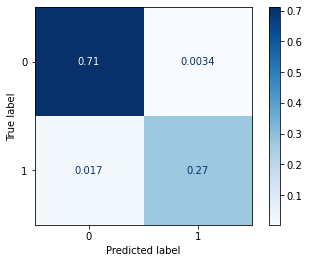

In [ ]:
model_lr = LogisticRegression(random_state= 42)
model_lr, roc_auc_lr, f1_score_lr = model_func(model_lr, X_train, y_train, X_test, y_test)

## Decision tree classifier

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=4)

Precision: 0.9830
Recall: 0.9971
Accuracy Score: 0.9942
F-1 Score: 0.9900
ROC_AUC = 0.9951
              precision    recall  f1-score   support

           0     0.9988    0.9931    0.9959     10400
           1     0.9830    0.9971    0.9900      4163

    accuracy                         0.9942     14563
   macro avg     0.9909    0.9951    0.9930     14563
weighted avg     0.9943    0.9942    0.9942     14563



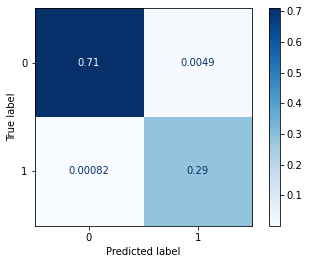

In [ ]:
model_dt, roc_auc_dt, f1_score_dt = model_func(model_dt, X_train, y_train, X_test, y_test)

## Random forest classifier

In [ ]:
model_rf = RandomForestClassifier(random_state=42)

Precision: 0.9834
Recall: 0.9971
Accuracy Score: 0.9944
F-1 Score: 0.9902
ROC_AUC = 0.9952
              precision    recall  f1-score   support

           0     0.9988    0.9933    0.9960     10400
           1     0.9834    0.9971    0.9902      4163

    accuracy                         0.9944     14563
   macro avg     0.9911    0.9952    0.9931     14563
weighted avg     0.9944    0.9944    0.9944     14563



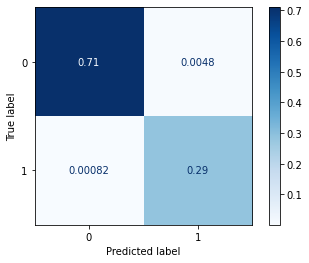

In [ ]:
model_rf, roc_auc_rf, f1_score_rf = model_func(model_rf, X_train, y_train, X_test, y_test)

## Gradient boosting classifiers

In [ ]:
from xgboost import XGBClassifier

Precision: 0.9834
Recall: 0.9976
Accuracy Score: 0.9945
F-1 Score: 0.9905
ROC_AUC = 0.9954
              precision    recall  f1-score   support

           0     0.9990    0.9933    0.9961     10400
           1     0.9834    0.9976    0.9905      4163

    accuracy                         0.9945     14563
   macro avg     0.9912    0.9954    0.9933     14563
weighted avg     0.9946    0.9945    0.9945     14563



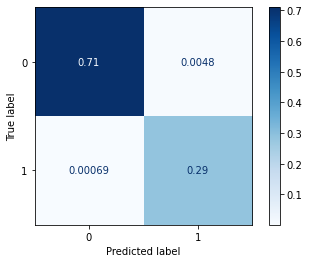

In [ ]:
model_xgbc = XGBClassifier()
model_xgbc, roc_auc_xgbc, f1_score_xgbc = model_func(model_xgbc, X_train, y_train, X_test, y_test)

## SMOTE techniques

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
from imblearn.combine import SMOTETomek, SMOTEENN

## ADASYN

In [ ]:
Counter(y_data)

Counter({0: 52108, 1: 20706})

In [ ]:
ada = ADASYN(random_state=42)

In [ ]:
X_data_ada, y_data_ada = ada.fit_resample(X_data, y_data)

In [ ]:
counts = Counter(y_data_ada)

In [ ]:
print('After resampling: ', counts)

After resampling:  Counter({0: 52108, 1: 52010})


## SMOTETomek

In [ ]:
smotet = SMOTETomek(random_state=42)
X_data_smotet, y_data_smotet = smotet.fit_resample(X_data, y_data)

In [ ]:
counts2 = Counter(y_data_smotet)

In [ ]:
print('After resampling: ', counts2)

After resampling:  Counter({0: 51924, 1: 51924})


## SMOTEENN

In [ ]:
smenn = SMOTEENN(random_state=42)
X_data_smenn, y_data_smenn = smenn.fit_resample(X_data, y_data)

In [ ]:
counts3 = Counter(y_data_smenn)

In [ ]:
print('After resampling: ', counts3)

After resampling:  Counter({0: 51189, 1: 50881})


## Logistic regression with resampled data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9907
Recall: 0.8444
Accuracy Score: 0.9194
F-1 Score: 0.9117
ROC_AUC = 0.9184
              precision    recall  f1-score   support

           0     0.8678    0.9923    0.9259     10562
           1     0.9907    0.8444    0.9117     10262

    accuracy                         0.9194     20824
   macro avg     0.9293    0.9184    0.9188     20824
weighted avg     0.9284    0.9194    0.9189     20824



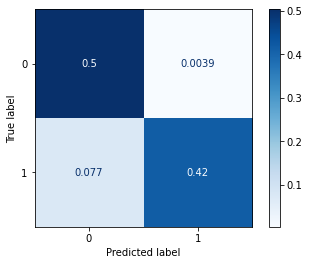

In [ ]:
model_lr_ada = LogisticRegression(random_state= 42)
model_lr_ada, roc_auc_lr_ada, f1_score_lr_ada = model_func(model_lr_ada, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9949
Recall: 0.9749
Accuracy Score: 0.9851
F-1 Score: 0.9848
ROC_AUC = 0.9850
              precision    recall  f1-score   support

           0     0.9759    0.9951    0.9854     10506
           1     0.9949    0.9749    0.9848     10264

    accuracy                         0.9851     20770
   macro avg     0.9854    0.9850    0.9851     20770
weighted avg     0.9853    0.9851    0.9851     20770



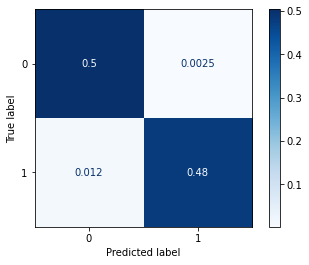

In [ ]:
model_lr_smotet = LogisticRegression(random_state= 42)
model_lr_smotet, roc_auc_lr_smotet, f1_score_lr_smotet = model_func(model_lr_smotet, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9995
Recall: 0.9988
Accuracy Score: 0.9992
F-1 Score: 0.9992
ROC_AUC = 0.9992
              precision    recall  f1-score   support

           0     0.9988    0.9995    0.9992     10326
           1     0.9995    0.9988    0.9992     10088

    accuracy                         0.9992     20414
   macro avg     0.9992    0.9992    0.9992     20414
weighted avg     0.9992    0.9992    0.9992     20414



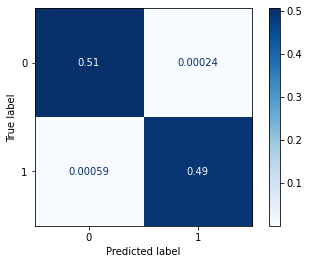

In [ ]:
model_lr_smenn = LogisticRegression(random_state= 42)
model_lr_smenn, roc_auc_lr_smenn, f1_score_lr_smenn = model_func(model_lr_smenn, X_train, y_train, X_test, y_test)

## Decision tree classifier with resampled data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9896
Recall: 0.9912
Accuracy Score: 0.9905
F-1 Score: 0.9904
ROC_AUC = 0.9905
              precision    recall  f1-score   support

           0     0.9915    0.9899    0.9907     10562
           1     0.9896    0.9912    0.9904     10262

    accuracy                         0.9905     20824
   macro avg     0.9905    0.9905    0.9905     20824
weighted avg     0.9905    0.9905    0.9905     20824



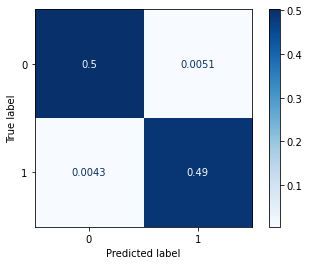

In [ ]:
model_dt_ada = DecisionTreeClassifier(max_depth=4)
model_dt_ada, roc_auc_dt_ada, f1_score_dt_ada = model_func(model_dt_ada, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9942
Recall: 0.9980
Accuracy Score: 0.9961
F-1 Score: 0.9961
ROC_AUC = 0.9961
              precision    recall  f1-score   support

           0     0.9980    0.9943    0.9961     10506
           1     0.9942    0.9980    0.9961     10264

    accuracy                         0.9961     20770
   macro avg     0.9961    0.9961    0.9961     20770
weighted avg     0.9961    0.9961    0.9961     20770



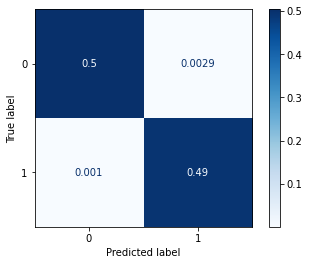

In [ ]:
model_dt_smotet = DecisionTreeClassifier(max_depth=4)
model_dt_smotet, roc_auc_dt_smotet, f1_score_dt_smotet = model_func(model_dt_smotet, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9994
Recall: 1.0000
Accuracy Score: 0.9997
F-1 Score: 0.9997
ROC_AUC = 0.9997
              precision    recall  f1-score   support

           0     1.0000    0.9994    0.9997     10326
           1     0.9994    1.0000    0.9997     10088

    accuracy                         0.9997     20414
   macro avg     0.9997    0.9997    0.9997     20414
weighted avg     0.9997    0.9997    0.9997     20414



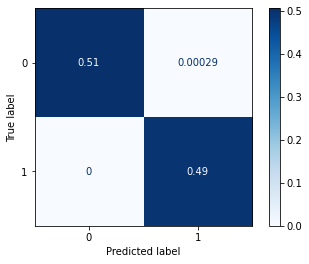

In [ ]:
model_dt_smenn = DecisionTreeClassifier(max_depth=4)
model_dt_smenn, roc_auc_dt_smenn, f1_score_dt_smenn = model_func(model_dt_smenn, X_train, y_train, X_test, y_test)

## Random forest classifier with resampled data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9922
Recall: 0.9989
Accuracy Score: 0.9956
F-1 Score: 0.9955
ROC_AUC = 0.9956
              precision    recall  f1-score   support

           0     0.9990    0.9923    0.9956     10562
           1     0.9922    0.9989    0.9955     10262

    accuracy                         0.9956     20824
   macro avg     0.9956    0.9956    0.9956     20824
weighted avg     0.9956    0.9956    0.9956     20824



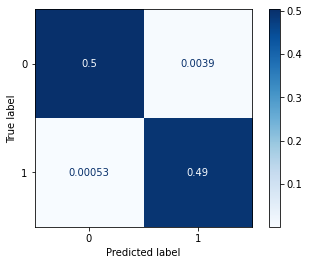

In [ ]:
model_rf_ada = RandomForestClassifier(random_state=42)
model_rf_ada, roc_auc_rf_ada, f1_score_rf_ada = model_func(model_rf_ada, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9943
Recall: 0.9980
Accuracy Score: 0.9961
F-1 Score: 0.9961
ROC_AUC = 0.9962
              precision    recall  f1-score   support

           0     0.9980    0.9944    0.9962     10506
           1     0.9943    0.9980    0.9961     10264

    accuracy                         0.9961     20770
   macro avg     0.9961    0.9962    0.9961     20770
weighted avg     0.9962    0.9961    0.9961     20770



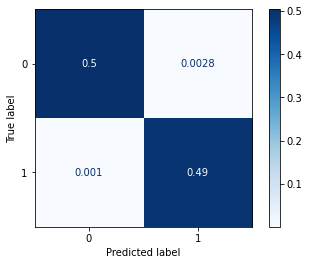

In [ ]:
model_rf_smotet = RandomForestClassifier(random_state=42)
model_rf_smotet, roc_auc_rf_smotet, f1_score_rf_smotet = model_func(model_rf_smotet, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9993
Recall: 0.9998
Accuracy Score: 0.9996
F-1 Score: 0.9996
ROC_AUC = 0.9996
              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9996     10326
           1     0.9993    0.9998    0.9996     10088

    accuracy                         0.9996     20414
   macro avg     0.9996    0.9996    0.9996     20414
weighted avg     0.9996    0.9996    0.9996     20414



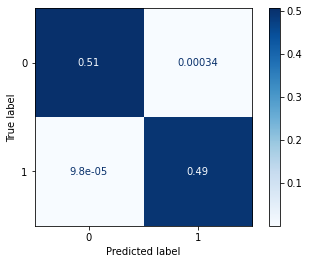

In [ ]:
model_rf_smenn = RandomForestClassifier(random_state=42)
model_rf_smenn, roc_auc_rf_smenn, f1_score_rf_smenn = model_func(model_rf_smenn, X_train, y_train, X_test, y_test)

## Gradient boosting classifier with resampled data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9910
Recall: 0.9946
Accuracy Score: 0.9929
F-1 Score: 0.9928
ROC_AUC = 0.9929
              precision    recall  f1-score   support

           0     0.9948    0.9912    0.9930     10562
           1     0.9910    0.9946    0.9928     10262

    accuracy                         0.9929     20824
   macro avg     0.9929    0.9929    0.9929     20824
weighted avg     0.9929    0.9929    0.9929     20824



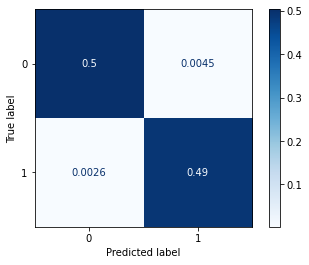

In [ ]:
model_xgbc_ada = XGBClassifier()
model_xgbc_ada, roc_auc_xgbc_ada, f1_score_xgbc_ada = model_func(model_xgbc_ada, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9943
Recall: 0.9979
Accuracy Score: 0.9961
F-1 Score: 0.9961
ROC_AUC = 0.9961
              precision    recall  f1-score   support

           0     0.9979    0.9944    0.9961     10506
           1     0.9943    0.9979    0.9961     10264

    accuracy                         0.9961     20770
   macro avg     0.9961    0.9961    0.9961     20770
weighted avg     0.9961    0.9961    0.9961     20770



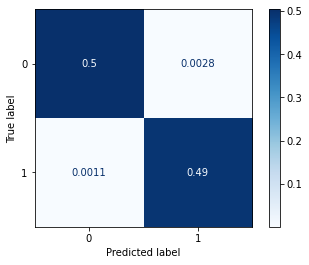

In [ ]:
model_xgbc_smotet = XGBClassifier()
model_xgbc_smotet, roc_auc_xgbc_smotet, f1_score_xgbc_smotet = model_func(model_xgbc_smotet, X_train, y_train, X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9994
Recall: 1.0000
Accuracy Score: 0.9997
F-1 Score: 0.9997
ROC_AUC = 0.9997
              precision    recall  f1-score   support

           0     1.0000    0.9994    0.9997     10326
           1     0.9994    1.0000    0.9997     10088

    accuracy                         0.9997     20414
   macro avg     0.9997    0.9997    0.9997     20414
weighted avg     0.9997    0.9997    0.9997     20414



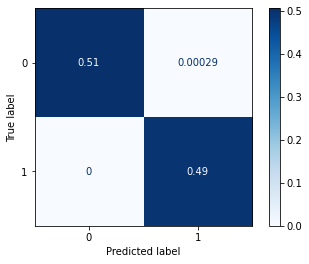

In [ ]:
model_xgbc_smenn = XGBClassifier()
model_xgbc_smenn, roc_auc_xgbc_smenn, f1_score_xgbc_smenn = model_func(model_xgbc_smenn, X_train, y_train, X_test, y_test)

# Best model

In [ ]:
df_test_cpy = df_test.copy()

test_id = df_test.pop('ID')

In [ ]:
prediction = model_xgbc_smenn.predict(df_test)
df_test_cpy['Default'] = prediction
sample = df_test_cpy[['ID', 'Default']]
sample.to_csv("loan_default_pred_xg.csv")

In [ ]:
pwd

'/content'

In [ ]:
df_test_cpy = df_test_cpy.drop('Default',axis=1)
prediction2 = model_dt_smenn.predict(df_test)
df_test_cpy['Default'] = prediction2
sample = df_test_cpy[['ID', 'Default']]
sample.to_csv("loan_default_pred_dt.csv")